In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV files
roberta_df = pd.read_csv('/content/drive/My Drive/lastresults/RoBERTa_validation_with_predictions_final .csv')
bert_df = pd.read_csv('/content/drive/My Drive/lastresults/BERT_validation_with_predictions_final.csv')
gpt2_df = pd.read_csv('/content/drive/My Drive/lastresults/GPT2_Final_Validation (1).csv')
distilbert_df = pd.read_csv('/content/drive/My Drive/lastresults/DistilBERT_validation_with_predictions_final.csv')

In [ ]:
# Display the first few observations for each DataFrame
print("RoBERTa Data:")
print(roberta_df.head())

print("\nBERT Data:")
print(bert_df.head())

print("\nGPT-2 Data:")
print(gpt2_df.head())

print("\nDistilBERT- Data:")
print(distilbert_df.head())




RoBERTa Data:
                                          reviewText  overall  \
0  I expected a decent book only to be given less...        0   
1  This was a very good book, I was glad I bought...        4   
2  An interesting book from both a literary and h...        3   
3  Interesting, fun, good light read.  I really e...        2   
4  Some students spend too many hours practicing....        2   

   predicted_values  
0                 0  
1                 4  
2                 3  
3                 3  
4                 2  

BERT Data:
                                          reviewText  overall  \
0  I expected a decent book only to be given less...        0   
1  This was a very good book, I was glad I bought...        4   
2  An interesting book from both a literary and h...        3   
3  Interesting, fun, good light read.  I really e...        2   
4  Some students spend too many hours practicing....        2   

   predicted_values  
0                 2  
1               

In [ ]:
import pandas as pd


distilbert_df.rename(columns={'overall': 'Actual Label', 'predicted_values': 'Predicted Label'}, inplace=True)
distilbert_df

roberta_df.rename(columns={'overall': 'Actual Label', 'predicted_values': 'Predicted Label'}, inplace=True)
distilbert_df

bert_df.rename(columns={'overall': 'Actual Label', 'predicted_values': 'Predicted Label'}, inplace=True)
distilbert_df



,reviewText,Actual Label,Predicted Label
0,I expected a decent book only to be given less...,0,0
1,"This was a very good book, I was glad I bought...",4,4
2,An interesting book from both a literary and h...,3,3
3,"Interesting, fun, good light read. I really e...",2,3
4,Some students spend too many hours practicing....,2,3
...,...,...,...
995,"Excellent follow up to the story, can't wait f...",4,4
996,Title: A Beautiful LiarAuthor: Leanna HarrowRe...,4,3
997,John Rain seems to be more doubtful of his rol...,4,3
998,"As I type this, I've already started in on the...",3,2


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Define a function to calculate metrics
def calculate_metrics(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    f1 = f1_score(actual, predicted, average='weighted')
    recall = recall_score(actual, predicted, average='weighted')
    return accuracy, f1, recall

# Calculate metrics for each DataFrame
roberta_accuracy, roberta_f1, roberta_recall = calculate_metrics(roberta_df['Actual Label'], roberta_df['Predicted Label'])
bert_accuracy, bert_f1, bert_recall = calculate_metrics(bert_df['Actual Label'], bert_df['Predicted Label'])
gpt2_accuracy, gpt2_f1, gpt2_recall = calculate_metrics(gpt2_df['Actual Label'], gpt2_df['Predicted Label'])
distilbert_accuracy, distilbert_f1, distilbert_recall = calculate_metrics(distilbert_df['Actual Label'], distilbert_df['Predicted Label'])
# Print the results
print("RoBERTa Metrics:")
print("Accuracy:", roberta_accuracy)
print("F1 Score:", roberta_f1)
print("Recall:", roberta_recall)

print("\nBERT Metrics:")
print("Accuracy:", bert_accuracy)
print("F1 Score:", bert_f1)
print("Recall:", bert_recall)

print("\nGPT-2 Metrics:")
print("Accuracy:", gpt2_accuracy)
print("F1 Score:", gpt2_f1)
print("Recall:", gpt2_recall)

print("\nDistilBERT Metrics:")
print("Accuracy:", distilbert_accuracy)
print("F1 Score:", distilbert_f1)
print("Recall:", distilbert_recall)





RoBERTa Metrics:
Accuracy: 0.67
F1 Score: 0.6652987101077754
Recall: 0.67

BERT Metrics:
Accuracy: 0.667
F1 Score: 0.646424598679904
Recall: 0.667

GPT-2 Metrics:
Accuracy: 0.656
F1 Score: 0.6377681792509443
Recall: 0.656

DistilBERT Metrics:
Accuracy: 0.639
F1 Score: 0.6280993230847024
Recall: 0.639


In [ ]:
from sklearn.metrics import precision_score

# Calculate metrics for each DataFrame
models = ['RoBERTa', 'BERT', 'GPT-2', 'DistilBERT']
accuracies = []
precisions = []
f1_scores = []
recalls = []

for df in [roberta_df, bert_df, gpt2_df, distilbert_df]:
    accuracy = accuracy_score(df['Actual Label'], df['Predicted Label'])
    precision = precision_score(df['Actual Label'], df['Predicted Label'], average='weighted')
    recall = recall_score(df['Actual Label'], df['Predicted Label'], average='weighted')
    f1 = f1_score(df['Actual Label'], df['Predicted Label'], average='weighted')
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'Recall': recalls,
    'Precision': precisions

})

# Print the metrics DataFrame
print(metrics_df)


        Model  Accuracy  F1 Score  Recall  Precision
0     RoBERTa     0.670  0.665299   0.670   0.665936
1        BERT     0.667  0.646425   0.667   0.643824
2       GPT-2     0.656  0.637768   0.656   0.658094
3  DistilBERT     0.639  0.628099   0.639   0.624251


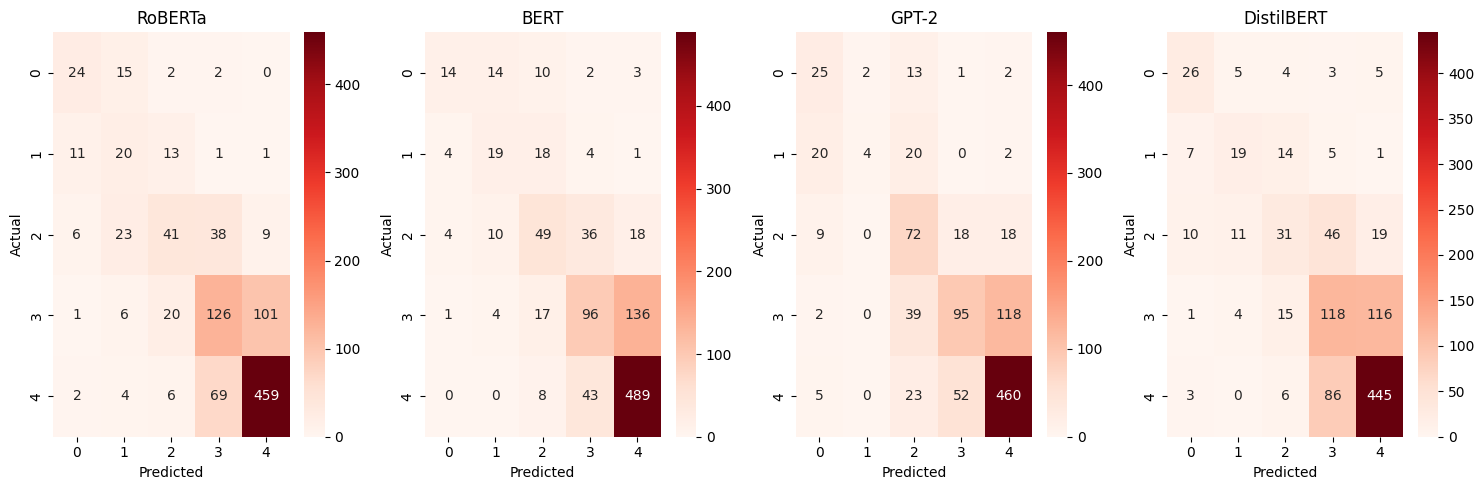

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each DataFrame
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Generate heatmaps for each DataFrame
for i, (df, title) in enumerate(zip([roberta_df, bert_df, gpt2_df, distilbert_df], ['RoBERTa', 'BERT', 'GPT-2','DistilBERT'])):
    confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='g', ax=axes[i])
    axes[i].set_title(title)

plt.tight_layout()
plt.show()



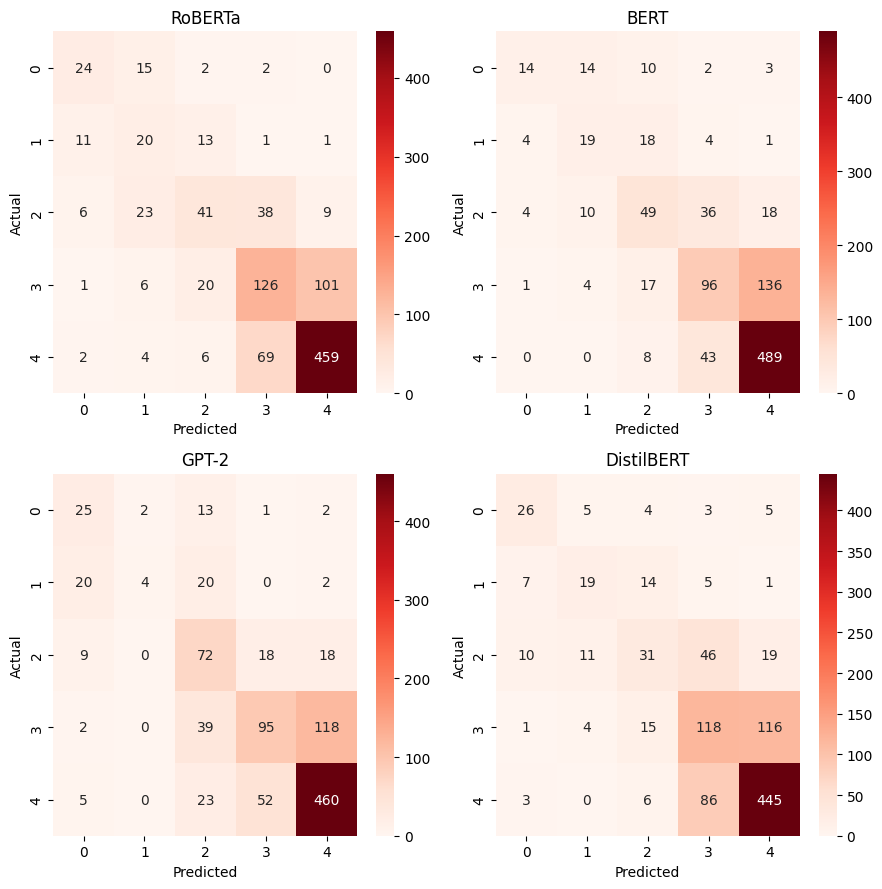

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots for each DataFrame in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Generate heatmaps for each DataFrame
for ax, (df, title) in zip(axes.flatten(), zip([roberta_df, bert_df, gpt2_df, distilbert_df], ['RoBERTa', 'BERT', 'GPT-2', 'DistilBERT'])):
    confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='g', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

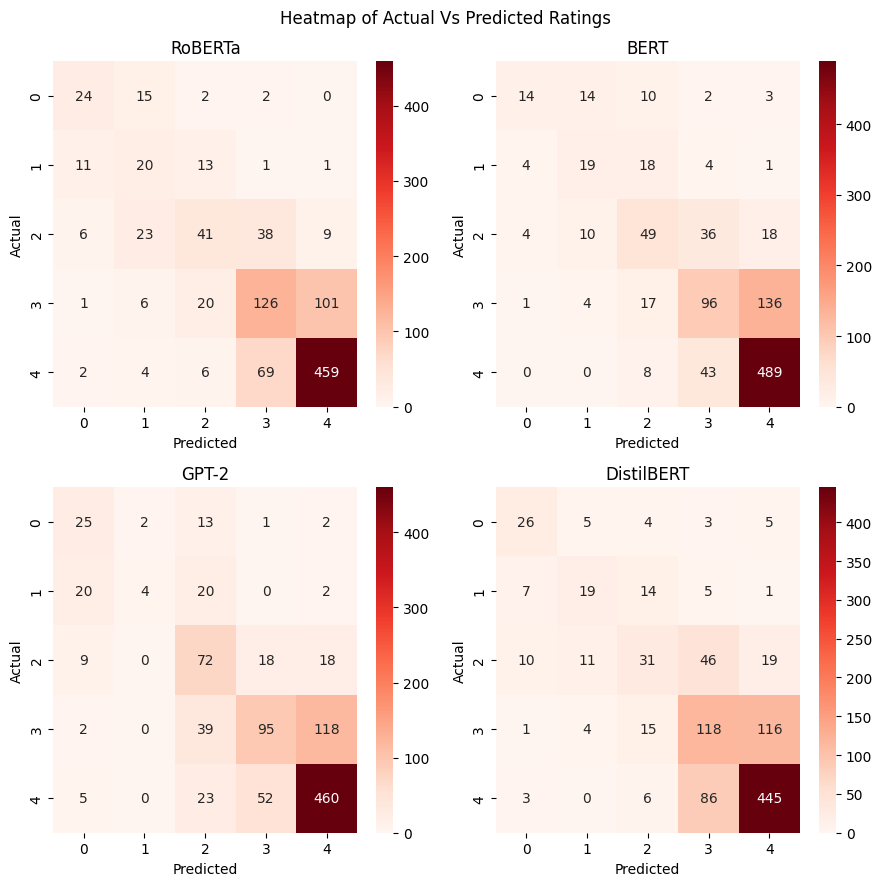

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots for each DataFrame in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Generate heatmaps for each DataFrame
for ax, (df, title) in zip(axes.flatten(), zip([roberta_df, bert_df, gpt2_df, distilbert_df], ['RoBERTa', 'BERT', 'GPT-2', 'DistilBERT'])):
    confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='g', ax=ax)
    ax.set_title(title)

# Add a title to the entire figure
fig.suptitle('Heatmap of Actual Vs Predicted Ratings')

plt.tight_layout()

# Save the figure
plt.savefig('/content/heatmap.png')

# Download the saved figure
from google.colab import files
files.download('/content/heatmap.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

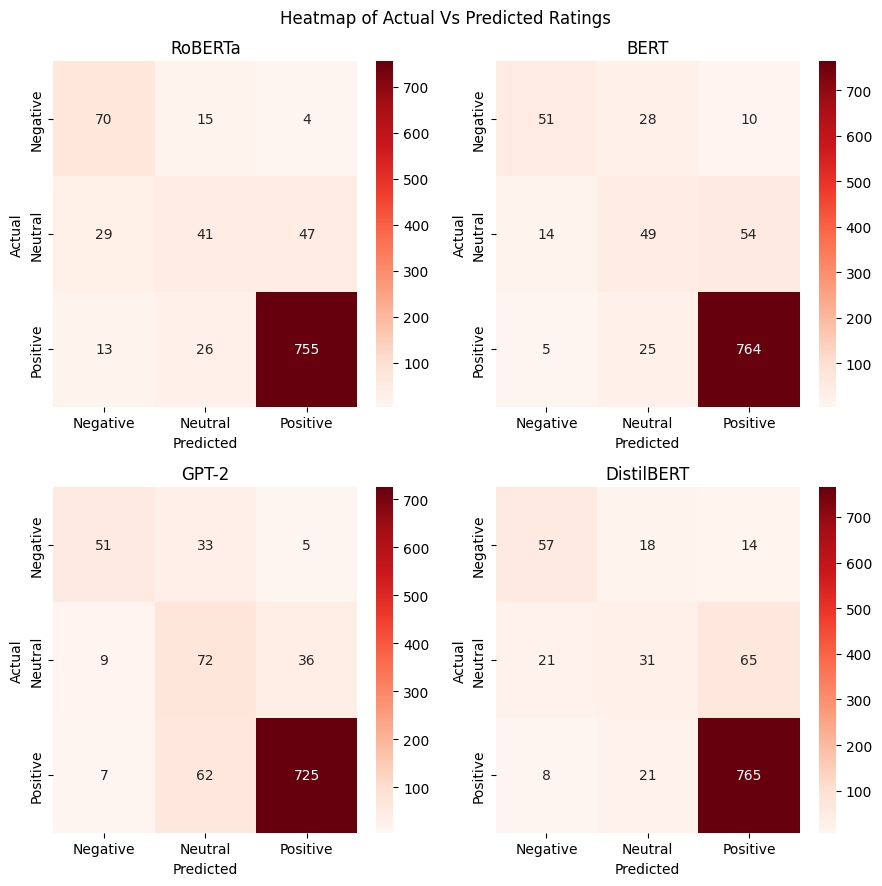

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to map ratings to categories
def map_ratings(rating):
    if rating in [0, 1]:
        return 'Negative'
    elif rating == 2:
        return 'Neutral'
    elif rating in [3, 4]:
        return 'Positive'

# Apply the mapping function to the 'Actual Label' and 'Predicted Label' columns
roberta_df['Actual Category'] = roberta_df['Actual Label'].apply(map_ratings)
roberta_df['Predicted Category'] = roberta_df['Predicted Label'].apply(map_ratings)

bert_df['Actual Category'] = bert_df['Actual Label'].apply(map_ratings)
bert_df['Predicted Category'] = bert_df['Predicted Label'].apply(map_ratings)

gpt2_df['Actual Category'] = gpt2_df['Actual Label'].apply(map_ratings)
gpt2_df['Predicted Category'] = gpt2_df['Predicted Label'].apply(map_ratings)

distilbert_df['Actual Category'] = distilbert_df['Actual Label'].apply(map_ratings)
distilbert_df['Predicted Category'] = distilbert_df['Predicted Label'].apply(map_ratings)

# Create subplots for each DataFrame in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Generate heatmaps for each DataFrame
for ax, (df, title) in zip(axes.flatten(), zip([roberta_df, bert_df, gpt2_df, distilbert_df], ['RoBERTa', 'BERT', 'GPT-2', 'DistilBERT'])):
    confusion_matrix = pd.crosstab(df['Actual Category'], df['Predicted Category'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='g', ax=ax)
    ax.set_title(title)

# Add a title to the entire figure
fig.suptitle('Heatmap of Actual Vs Predicted Ratings')

plt.tight_layout()

# Save the figure
plt.savefig('/content/heatmap.png')

# Download the saved figure
from google.colab import files
files.download('/content/heatmap.png')


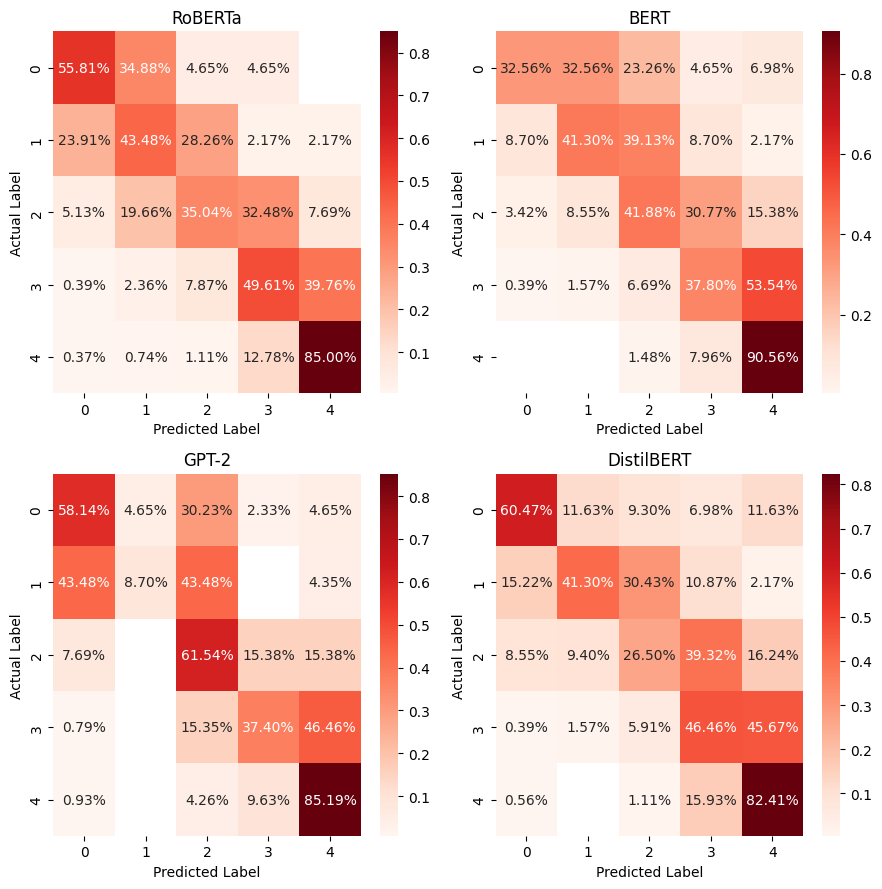

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Function to calculate percentages
def calculate_percentage(df):
    total_counts = df['Actual Label'].value_counts()
    return df.groupby(['Actual Label', 'Predicted Label']).size().unstack().div(total_counts, axis=0)

# Create a figure with a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Generate heatmaps for each DataFrame
for ax, (df, title) in zip(axes.flatten(), zip([roberta_df, bert_df, gpt2_df, distilbert_df], ['RoBERTa', 'BERT', 'GPT-2','DistilBERT'])):
    percentages = calculate_percentage(df)
    sns.heatmap(percentages, annot=True, cmap='Reds', fmt='.2%', ax=ax, cbar=True)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')

plt.tight_layout()

# Save the figure as PNG
#plt.savefig('heatmap_grid_with_colorbar.png')

# Download the PNG file
#files.download('heatmap_grid_with_colorbar.png')


In [ ]:
# Define a function to filter misclassified observations
def analyze_misclassified(df):
    misclassified = df[df['Actual Label'] != df['Predicted Label']]
    return misclassified

# Analyze misclassified observations for each DataFrame
roberta_misclassified = analyze_misclassified(roberta_df)
bert_misclassified = analyze_misclassified(bert_df)
gpt2_misclassified = analyze_misclassified(gpt2_df)
distilbert_misclassified = analyze_misclassified(distilbert_df)

# Print the misclassified observations for each DataFrame
print("RoBERTa Misclassified Observations:")
print(roberta_misclassified)

print("\nBERT Misclassified Observations:")
print(bert_misclassified)

print("\nGPT-2 Misclassified Observations:")
print(gpt2_misclassified)

print("\nDistilBERT Misclassified Observations:")
print(distilbert_misclassified)




RoBERTa Misclassified Observations:
                                            reviewText  Actual Label  \
3    Interesting, fun, good light read.  I really e...             2   
6    I thin k I WASNT IN THE MOOD TO READ IT, i'LL ...             0   
8    I'm still perusing this but for my family, I'm...             2   
11   Right now I would give this book 3 stars becau...             2   
14   The only problem is the time issues compared w...             4   
..                                                 ...           ...   
974  This book gives you some great ideas on the ki...             3   
977  What a dramatic view of the history of Texas f...             4   
990  What was most fascinating about this book was ...             2   
996  Title: A Beautiful LiarAuthor: Leanna HarrowRe...             4   
997  John Rain seems to be more doubtful of his rol...             4   

     Predicted Label Actual Category Predicted Category  
3                  3         Neutral     

In [ ]:
# Find the common misclassified observations
common_misclassified_indices = list(set(roberta_misclassified.index) & set(bert_misclassified.index) & set(gpt2_misclassified.index) & set(distilbert_misclassified.index))

# Filter the misclassified observations based on common indices
common_misclassified_roberta = roberta_misclassified.loc[common_misclassified_indices]
common_misclassified_bert = bert_misclassified.loc[common_misclassified_indices]
common_misclassified_gpt2 = gpt2_misclassified.loc[common_misclassified_indices]
common_misclassified_distilbert = distilbert_misclassified.loc[common_misclassified_indices]

# Print the common misclassified observations
print("Common Misclassified Observations:")
print(common_misclassified_roberta)
print(common_misclassified_bert)
print(common_misclassified_gpt2)
print(common_misclassified_distilbert)


Common Misclassified Observations:
                                            reviewText  Actual Label  \
3    Interesting, fun, good light read.  I really e...             2   
6    I thin k I WASNT IN THE MOOD TO READ IT, i'LL ...             0   
8    I'm still perusing this but for my family, I'm...             2   
14   The only problem is the time issues compared w...             4   
16   Nicholas Sparks is one of my favorite authors....             3   
..                                                 ...           ...   
997  John Rain seems to be more doubtful of his rol...             4   
493  This was told in 2person POV and it had really...             4   
498  Fast moving story with a WW II history backgro...             3   
499  When the questions are  hard and the answers u...             3   
506  Ashes rocked me to my core, like the EMP that ...             3   

     Predicted Label Actual Category Predicted Category  
3                  3         Neutral      

In [ ]:
# Define a function to count misclassified instances for each actual label
def count_misclassified_per_actual_label(df):
    misclassified_counts = df[df['Actual Label'] != df['Predicted Label']].groupby('Actual Label').size().reset_index(name='Misclassified Count')
    return misclassified_counts

# Calculate misclassified instances for each actual label for each DataFrame
roberta_misclassified_per_actual_label = count_misclassified_per_actual_label(roberta_df)
bert_misclassified_per_actual_label = count_misclassified_per_actual_label(bert_df)
gpt2_misclassified_per_actual_label = count_misclassified_per_actual_label(gpt2_df)
distilbert_misclassified_per_actual_label = count_misclassified_per_actual_label(distilbert_df)
# Print the results for each DataFrame
print("RoBERTa Misclassified Instances per Actual Label:")
print(roberta_misclassified_per_actual_label)

print("\nBERT Misclassified Instances per Actual Label:")
print(bert_misclassified_per_actual_label)

print("\nGPT-2 Misclassified Instances per Actual Label:")
print(gpt2_misclassified_per_actual_label)

print("\nDistilBERT Misclassified Instances per Actual Label:")
print(distilbert_misclassified_per_actual_label)



RoBERTa Misclassified Instances per Actual Label:
   Actual Label  Misclassified Count
0             0                   19
1             1                   26
2             2                   76
3             3                  128
4             4                   81

BERT Misclassified Instances per Actual Label:
   Actual Label  Misclassified Count
0             0                   29
1             1                   27
2             2                   68
3             3                  158
4             4                   51

GPT-2 Misclassified Instances per Actual Label:
   Actual Label  Misclassified Count
0             0                   18
1             1                   42
2             2                   45
3             3                  159
4             4                   80

DistilBERT Misclassified Instances per Actual Label:
   Actual Label  Misclassified Count
0             0                   17
1             1                   27
2             2       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

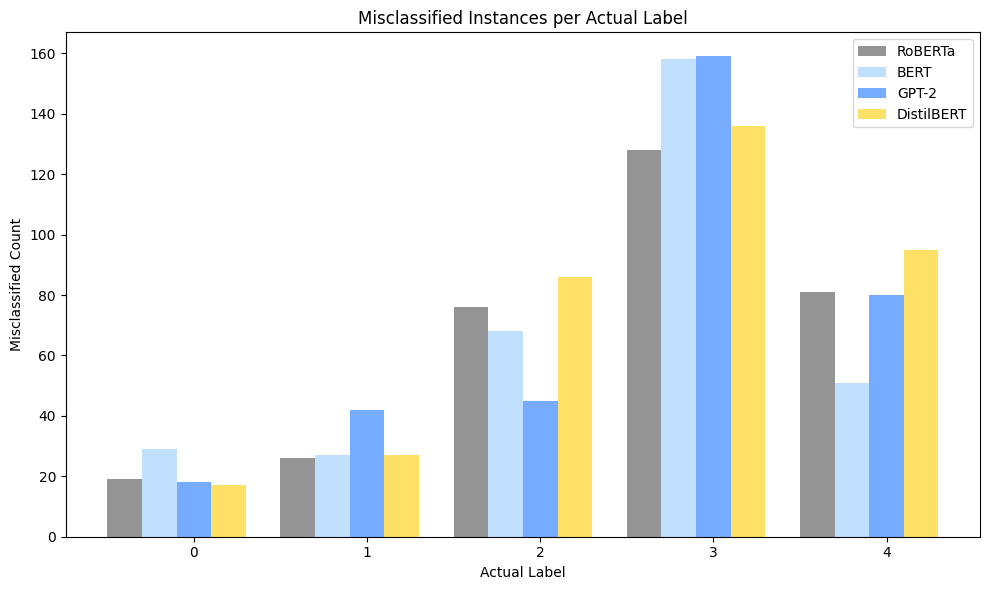

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Function to create bar graph with multiple DataFrames
def create_superimposed_bar_graph(dfs, titles, filename=None):
    plt.figure(figsize=(10, 6))
    bar_width = 0.2
    opacity = 0.6
    index = np.arange(len(dfs[0]['Actual Label']))
    colors = ['#4d4d4d', '#99ccff', '#1a75ff', '#ffcc00']  # Grey, blue, and yellow colors

    for i, df in enumerate(dfs):
        labels = df['Actual Label']
        counts = df['Misclassified Count']
        plt.bar(index + i * bar_width, counts, bar_width, alpha=opacity, color=colors[i], label=titles[i])

    plt.xlabel('Actual Label')
    plt.ylabel('Misclassified Count')
    plt.title('Misclassified Instances per Actual Label')
    plt.xticks(index + bar_width * (len(dfs) / 2), labels)
    plt.legend()
    plt.tight_layout()

    # Save the figure
    if filename:
        plt.savefig(filename)
        files.download(filename)  # Download the saved file to local system

    plt.show()


create_superimposed_bar_graph(
    [roberta_misclassified_per_actual_label, bert_misclassified_per_actual_label, gpt2_misclassified_per_actual_label, distilbert_misclassified_per_actual_label],
    ['RoBERTa', 'BERT', 'GPT-2', 'DistilBERT'],
    filename="Misclassified Instances per Actual Label.png"
)


In [ ]:
# Define a function to calculate the number of misclassified instances for each value of label
def count_misclassified_per_label(df):
    misclassified_counts = df.groupby(['Actual Label', 'Predicted Label']).size().reset_index(name='Misclassified Count')
    return misclassified_counts

# Calculate misclassified instances for each value of label for each DataFrame
roberta_misclassified_counts = count_misclassified_per_label(roberta_misclassified)
bert_misclassified_counts = count_misclassified_per_label(bert_misclassified)
gpt2_misclassified_counts = count_misclassified_per_label(gpt2_misclassified)
distilbert_misclassified_counts = count_misclassified_per_label(distilbert_misclassified)

# Print the results for each DataFrame
print("RoBERTa Misclassified Instances per Label:")
print(roberta_misclassified_counts)

print("\nBERT Misclassified Instances per Label:")
print(bert_misclassified_counts)

print("\nGPT-2 Misclassified Instances per Label:")
print(gpt2_misclassified_counts)

print("\nDistilBERT Misclassified Instances per Label:")
print(distilbert_misclassified_counts)


RoBERTa Misclassified Instances per Label:
    Actual Label  Predicted Label  Misclassified Count
0              0                1                   15
1              0                2                    2
2              0                3                    2
3              1                0                   11
4              1                2                   13
5              1                3                    1
6              1                4                    1
7              2                0                    6
8              2                1                   23
9              2                3                   38
10             2                4                    9
11             3                0                    1
12             3                1                    6
13             3                2                   20
14             3                4                  101
15             4                0                    2
16             4      

In [ ]:
# Count the number of each actual label in each DataFrame
bert_label_counts = bert_df['Actual Label'].value_counts()
gpt2_label_counts = gpt2_df['Actual Label'].value_counts()
distilbert_label_counts = distilbert_df['Actual Label'].value_counts()
roberta_label_counts = roberta_df['Actual Label'].value_counts()

# Print the label counts for each DataFrame
print("BERT Label Counts:")
print(bert_label_counts)

print("\nGPT-2 Label Counts:")
print(gpt2_label_counts)

print("\nDistilBERT Label Counts:")
print(distilbert_label_counts)

print("\nRoBERTa Label Counts:")
print(roberta_label_counts)


BERT Label Counts:
Actual Label
4    540
3    254
2    117
1     46
0     43
Name: count, dtype: int64

GPT-2 Label Counts:
Actual Label
4    540
3    254
2    117
1     46
0     43
Name: count, dtype: int64

DistilBERT Label Counts:
Actual Label
4    540
3    254
2    117
1     46
0     43
Name: count, dtype: int64

RoBERTa Label Counts:
Actual Label
4    540
3    254
2    117
1     46
0     43
Name: count, dtype: int64


In [ ]:
# Function to calculate misclassified instances per actual label
def calculate_misclassified_per_actual_label(df):
    misclassified_per_actual_label = df[df['Actual Label'] != df['Predicted Label']].groupby('Actual Label').size().reset_index(name='Misclassified Count')
    return misclassified_per_actual_label

# Calculate misclassified instances per actual label for each DataFrame
bert_misclassified_per_actual_label = calculate_misclassified_per_actual_label(bert_df)
gpt2_misclassified_per_actual_label = calculate_misclassified_per_actual_label(gpt2_df)
distilbert_misclassified_per_actual_label = calculate_misclassified_per_actual_label(distilbert_df)
roberta_misclassified_per_actual_label = calculate_misclassified_per_actual_label(roberta_df)

# Print the misclassified instances per actual label for each DataFrame
print("BERT Misclassified Instances per Actual Label:")
print(bert_misclassified_per_actual_label)

print("\nGPT-2 Misclassified Instances per Actual Label:")
print(gpt2_misclassified_per_actual_label)

print("\nDistilBERT Misclassified Instances per Actual Label:")
print(distilbert_misclassified_per_actual_label)

print("\nRoBERTa Misclassified Instances per Actual Label:")
print(roberta_misclassified_per_actual_label)


BERT Misclassified Instances per Actual Label:
   Actual Label  Misclassified Count
0             0                   29
1             1                   27
2             2                   68
3             3                  158
4             4                   51

GPT-2 Misclassified Instances per Actual Label:
   Actual Label  Misclassified Count
0             0                   18
1             1                   42
2             2                   45
3             3                  159
4             4                   80

DistilBERT Misclassified Instances per Actual Label:
   Actual Label  Misclassified Count
0             0                   17
1             1                   27
2             2                   86
3             3                  136
4             4                   95

RoBERTa Misclassified Instances per Actual Label:
   Actual Label  Misclassified Count
0             0                   19
1             1                   26
2             2       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

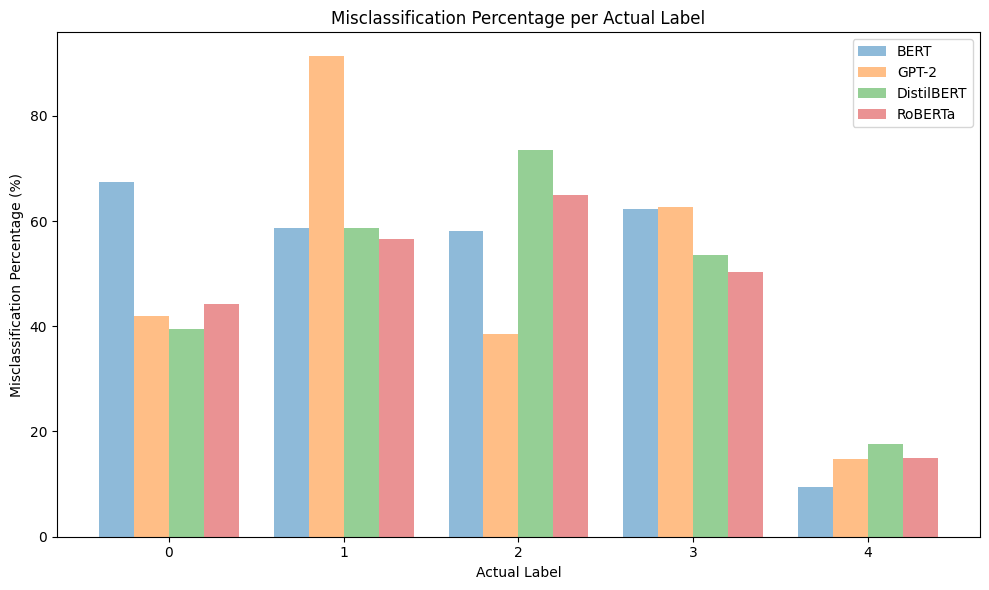

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate misclassification percentage for each actual label
def calculate_misclassification_percentage(df, label_counts):
    misclassified_per_actual_label = df[df['Actual Label'] != df['Predicted Label']].groupby('Actual Label').size()
    misclassification_percentage = misclassified_per_actual_label / label_counts * 100
    return misclassification_percentage.fillna(0)

# Calculate the counts of each actual label in each DataFrame
bert_label_counts = bert_df['Actual Label'].value_counts()
gpt2_label_counts = gpt2_df['Actual Label'].value_counts()
distilbert_label_counts = distilbert_df['Actual Label'].value_counts()
roberta_label_counts = roberta_df['Actual Label'].value_counts()

# Calculate misclassification percentage for each actual label for each DataFrame
bert_misclassification_percentage = calculate_misclassification_percentage(bert_df, bert_label_counts)
gpt2_misclassification_percentage = calculate_misclassification_percentage(gpt2_df, gpt2_label_counts)
distilbert_misclassification_percentage = calculate_misclassification_percentage(distilbert_df, distilbert_label_counts)
roberta_misclassification_percentage = calculate_misclassification_percentage(roberta_df, roberta_label_counts)

# Plot the misclassification percentage for each label value for all DataFrames
plt.figure(figsize=(10, 6))

# Mix of colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot BERT
plt.bar(np.arange(len(bert_misclassification_percentage)), bert_misclassification_percentage, width=0.2, label='BERT', alpha=0.5, color=colors[0])

# Plot GPT-2
plt.bar(np.arange(len(gpt2_misclassification_percentage)) + 0.2, gpt2_misclassification_percentage, width=0.2, label='GPT-2', alpha=0.5, color=colors[1])

# Plot DistilBERT
plt.bar(np.arange(len(distilbert_misclassification_percentage)) + 0.4, distilbert_misclassification_percentage, width=0.2, label='DistilBERT', alpha=0.5, color=colors[2])

# Plot RoBERTa
plt.bar(np.arange(len(roberta_misclassification_percentage)) + 0.6, roberta_misclassification_percentage, width=0.2, label='RoBERTa', alpha=0.5, color=colors[3])

plt.xlabel('Actual Label')
plt.ylabel('Misclassification Percentage (%)')
plt.title('Misclassification Percentage per Actual Label')
plt.xticks(np.arange(len(bert_misclassification_percentage)) + 0.3, bert_misclassification_percentage.index)
plt.legend()
plt.tight_layout()

# Save the figure as an image file
plt.savefig('misclassification_percentage_plot.png')

# Download the image file
from google.colab import files
files.download('misclassification_percentage_plot.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

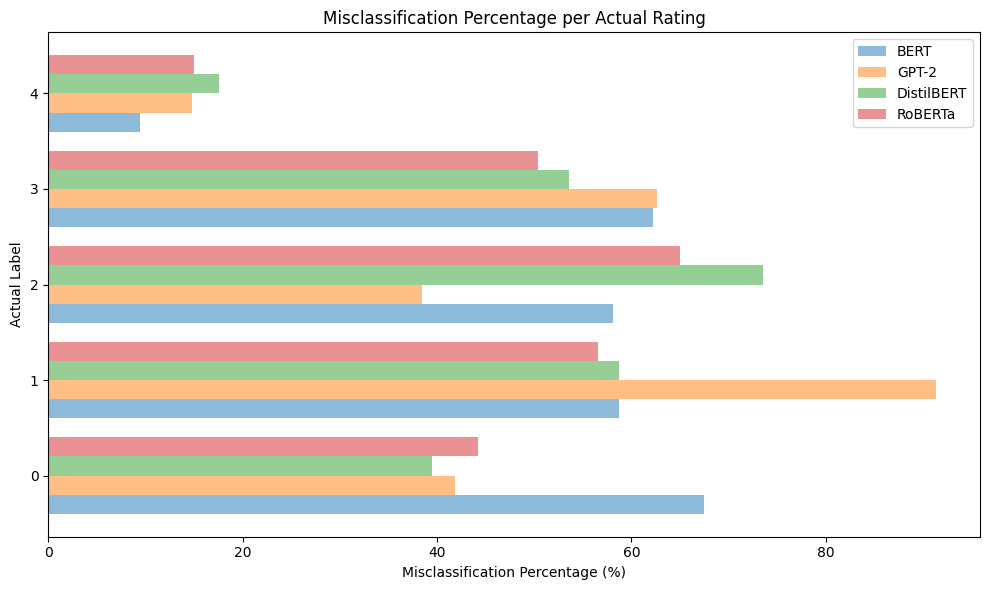

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate misclassification percentage for each actual label
def calculate_misclassification_percentage(df, label_counts):
    misclassified_per_actual_label = df[df['Actual Label'] != df['Predicted Label']].groupby('Actual Label').size()
    misclassification_percentage = misclassified_per_actual_label / label_counts * 100
    return misclassification_percentage.fillna(0)

# Calculate the counts of each actual label in each DataFrame
bert_label_counts = bert_df['Actual Label'].value_counts()
gpt2_label_counts = gpt2_df['Actual Label'].value_counts()
distilbert_label_counts = distilbert_df['Actual Label'].value_counts()
roberta_label_counts = roberta_df['Actual Label'].value_counts()

# Calculate misclassification percentage for each actual label for each DataFrame
bert_misclassification_percentage = calculate_misclassification_percentage(bert_df, bert_label_counts)
gpt2_misclassification_percentage = calculate_misclassification_percentage(gpt2_df, gpt2_label_counts)
distilbert_misclassification_percentage = calculate_misclassification_percentage(distilbert_df, distilbert_label_counts)
roberta_misclassification_percentage = calculate_misclassification_percentage(roberta_df, roberta_label_counts)

# Plot the misclassification percentage for each label value for all DataFrames
plt.figure(figsize=(10, 6))

# Mix of colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot BERT
plt.barh(np.arange(len(bert_misclassification_percentage)), bert_misclassification_percentage, height=0.2, label='BERT', alpha=0.5, color=colors[0])

# Plot GPT-2
plt.barh(np.arange(len(gpt2_misclassification_percentage)) + 0.2, gpt2_misclassification_percentage, height=0.2, label='GPT-2', alpha=0.5, color=colors[1])

# Plot DistilBERT
plt.barh(np.arange(len(distilbert_misclassification_percentage)) + 0.4, distilbert_misclassification_percentage, height=0.2, label='DistilBERT', alpha=0.5, color=colors[2])

# Plot RoBERTa
plt.barh(np.arange(len(roberta_misclassification_percentage)) + 0.6, roberta_misclassification_percentage, height=0.2, label='RoBERTa', alpha=0.5, color=colors[3])

plt.ylabel('Actual Label')
plt.xlabel('Misclassification Percentage (%)')
plt.title('Misclassification Percentage per Actual Rating')
plt.yticks(np.arange(len(bert_misclassification_percentage)) + 0.3, bert_misclassification_percentage.index)
plt.legend()
plt.tight_layout()

# Save the figure as an image file
plt.savefig('misclassification_percentage_plot.png')

# Download the image file
from google.colab import files
files.download('misclassification_percentage_plot.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

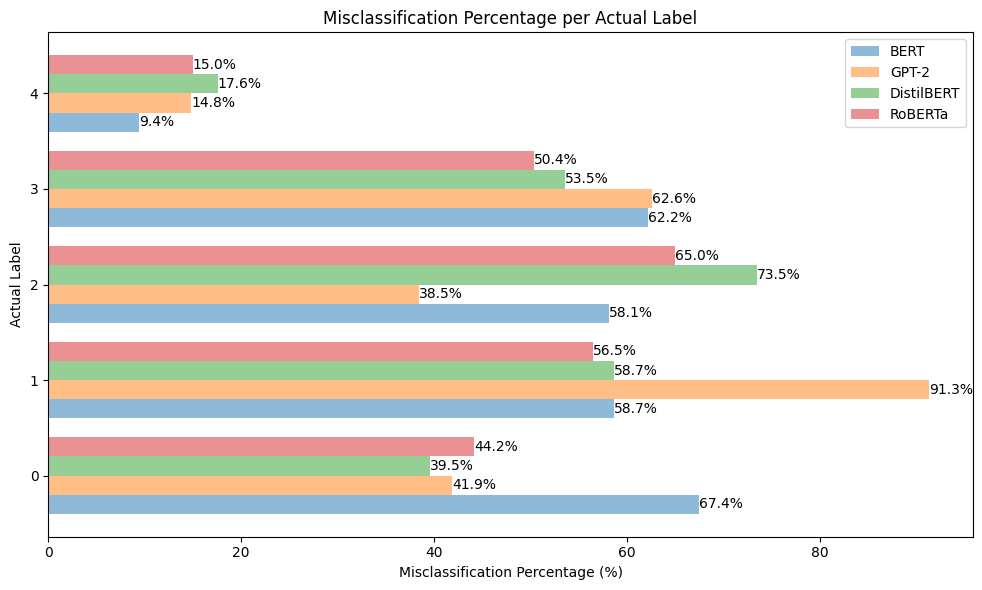

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate misclassification percentage for each actual label
def calculate_misclassification_percentage(df, label_counts):
    misclassified_per_actual_label = df[df['Actual Label'] != df['Predicted Label']].groupby('Actual Label').size()
    misclassification_percentage = misclassified_per_actual_label / label_counts * 100
    return misclassification_percentage.fillna(0)

# Calculate the counts of each actual label in each DataFrame
bert_label_counts = bert_df['Actual Label'].value_counts()
gpt2_label_counts = gpt2_df['Actual Label'].value_counts()
distilbert_label_counts = distilbert_df['Actual Label'].value_counts()
roberta_label_counts = roberta_df['Actual Label'].value_counts()

# Calculate misclassification percentage for each actual label for each DataFrame
bert_misclassification_percentage = calculate_misclassification_percentage(bert_df, bert_label_counts)
gpt2_misclassification_percentage = calculate_misclassification_percentage(gpt2_df, gpt2_label_counts)
distilbert_misclassification_percentage = calculate_misclassification_percentage(distilbert_df, distilbert_label_counts)
roberta_misclassification_percentage = calculate_misclassification_percentage(roberta_df, roberta_label_counts)

# Plot the misclassification percentage for each label value for all DataFrames
plt.figure(figsize=(10, 6))

# Mix of colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot BERT
plt.barh(np.arange(len(bert_misclassification_percentage)), bert_misclassification_percentage, height=0.2, label='BERT', alpha=0.5, color=colors[0])

# Plot GPT-2
plt.barh(np.arange(len(gpt2_misclassification_percentage)) + 0.2, gpt2_misclassification_percentage, height=0.2, label='GPT-2', alpha=0.5, color=colors[1])

# Plot DistilBERT
plt.barh(np.arange(len(distilbert_misclassification_percentage)) + 0.4, distilbert_misclassification_percentage, height=0.2, label='DistilBERT', alpha=0.5, color=colors[2])

# Plot RoBERTa
plt.barh(np.arange(len(roberta_misclassification_percentage)) + 0.6, roberta_misclassification_percentage, height=0.2, label='RoBERTa', alpha=0.5, color=colors[3])

plt.ylabel('Actual Label')
plt.xlabel('Misclassification Percentage (%)')
plt.title('Misclassification Percentage per Actual Label')
plt.yticks(np.arange(len(bert_misclassification_percentage)) + 0.3, bert_misclassification_percentage.index)
plt.legend()

# Add percentage labels inside the bars
for idx, value in enumerate(bert_misclassification_percentage):
    plt.text(value, idx, f'{value:.1f}%', va='center', ha='left', color='black')

for idx, value in enumerate(gpt2_misclassification_percentage):
    plt.text(value, idx + 0.2, f'{value:.1f}%', va='center', ha='left', color='black')

for idx, value in enumerate(distilbert_misclassification_percentage):
    plt.text(value, idx + 0.4, f'{value:.1f}%', va='center', ha='left', color='black')

for idx, value in enumerate(roberta_misclassification_percentage):
    plt.text(value, idx + 0.6, f'{value:.1f}%', va='center', ha='left', color='black')

plt.tight_layout()

# Save the figure as an image file
plt.savefig('misclassification_percentage_plot.png')

# Download the image file
from google.colab import files
files.download('misclassification_percentage_plot.png')



In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Define a function to calculate metrics for each rating
def calculate_metrics_for_rating(df):
    ratings = df['Actual Label'].unique()
    metrics = []
    for rating in ratings:
        subset_df = df[df['Actual Label'] == rating]
        accuracy = accuracy_score(subset_df['Actual Label'], subset_df['Predicted Label'])
        f1 = f1_score(subset_df['Actual Label'], subset_df['Predicted Label'], average='weighted')
        metrics.append({'Rating': rating, 'Accuracy': accuracy, 'F1 Score': f1})
    return pd.DataFrame(metrics)

# Calculate metrics for each DataFrame
roberta_metrics = calculate_metrics_for_rating(roberta_df)
bert_metrics = calculate_metrics_for_rating(bert_df)
gpt2_metrics = calculate_metrics_for_rating(gpt2_df)
distilbert_metrics = calculate_metrics_for_rating(distilbert_df)

# Display the tables
print("RoBERTa Metrics:")
print(roberta_metrics)

print("\nBERT Metrics:")
print(bert_metrics)

print("\nGPT-2 Metrics:")
print(gpt2_metrics)

print("\nDistilBERT Metrics:")
print(distilbert_metrics)


RoBERTa Metrics:
   Rating  Accuracy  F1 Score
0       0  0.558140  0.716418
1       4  0.850000  0.918919
2       3  0.496063  0.663158
3       2  0.350427  0.518987
4       1  0.434783  0.606061

BERT Metrics:
   Rating  Accuracy  F1 Score
0       0  0.325581  0.491228
1       4  0.905556  0.950437
2       3  0.377953  0.548571
3       2  0.418803  0.590361
4       1  0.413043  0.584615

GPT-2 Metrics:
   Rating  Accuracy  F1 Score
0       0  0.581395  0.735294
1       4  0.851852  0.920000
2       3  0.374016  0.544413
3       2  0.615385  0.761905
4       1  0.086957  0.160000

DistilBERT Metrics:
   Rating  Accuracy  F1 Score
0       0  0.604651  0.753623
1       4  0.824074  0.903553
2       3  0.464567  0.634409
3       2  0.264957  0.418919
4       1  0.413043  0.584615


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd

# Define a function to calculate metrics for each rating
def calculate_metrics_for_rating(df):
    ratings = df['Actual Label'].unique()
    metrics = []
    for rating in ratings:
        subset_df = df[df['Actual Label'] == rating]
        accuracy = accuracy_score(subset_df['Actual Label'], subset_df['Predicted Label'])
        f1 = f1_score(subset_df['Actual Label'], subset_df['Predicted Label'], average='weightedq')
        recall = recall_score(subset_df['Actual Label'], subset_df['Predicted Label'], average='weighted')
        precision = precision_score(subset_df['Actual Label'], subset_df['Predicted Label'], average='weighted')
        metrics.append({'Rating': rating, 'Accuracy': accuracy, 'F1 Score': f1, 'Recall': recall, 'Precision': precision})
    return pd.DataFrame(metrics)

# Calculate metrics for each DataFrame
roberta_metrics = calculate_metrics_for_rating(roberta_df)
bert_metrics = calculate_metrics_for_rating(bert_df)
gpt2_metrics = calculate_metrics_for_rating(gpt2_df)
distilbert_metrics = calculate_metrics_for_rating(distilbert_df)

# Display the tables
print("RoBERTa Metrics:")
print(roberta_metrics)

print("\nBERT Metrics:")
print(bert_metrics)

print("\nGPT-2 Metrics:")
print(gpt2_metrics)

print("\nDistilBERT Metrics:")
print(distilbert_metrics)


RoBERTa Metrics:
   Rating  Accuracy  F1 Score    Recall  Precision
0       0  0.558140  0.716418  0.558140        1.0
1       4  0.850000  0.918919  0.850000        1.0
2       3  0.496063  0.663158  0.496063        1.0
3       2  0.350427  0.518987  0.350427        1.0
4       1  0.434783  0.606061  0.434783        1.0

BERT Metrics:
   Rating  Accuracy  F1 Score    Recall  Precision
0       0  0.325581  0.491228  0.325581        1.0
1       4  0.905556  0.950437  0.905556        1.0
2       3  0.377953  0.548571  0.377953        1.0
3       2  0.418803  0.590361  0.418803        1.0
4       1  0.413043  0.584615  0.413043        1.0

GPT-2 Metrics:
   Rating  Accuracy  F1 Score    Recall  Precision
0       0  0.581395  0.735294  0.581395        1.0
1       4  0.851852  0.920000  0.851852        1.0
2       3  0.374016  0.544413  0.374016        1.0
3       2  0.615385  0.761905  0.615385        1.0
4       1  0.086957  0.160000  0.086957        1.0

DistilBERT Metrics:
   Rating  Ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

In [ ]:
from sklearn.metrics import f1_score

# Function to calculate F1 score per label
def calculate_f1_score_per_label(df):
    f1_scores = {}
    unique_labels = df['Actual Label'].unique()
    for label in unique_labels:
        true_labels = df['Actual Label'] == label
        predicted_labels = df['Predicted Label'] == label
        f1_scores[label] = f1_score(true_labels, predicted_labels)
    return f1_scores

# Calculate F1 score per label for each model
bert_f1_scores = calculate_f1_score_per_label(bert_df)
gpt2_f1_scores = calculate_f1_score_per_label(gpt2_df)
distilbert_f1_scores = calculate_f1_score_per_label(distilbert_df)
roberta_f1_scores = calculate_f1_score_per_label(roberta_df)

# Print F1 scores for each model
print("BERT F1 Scores per Label:")
print(bert_f1_scores)
print("\nGPT-2 F1 Scores per Label:")
print(gpt2_f1_scores)
print("\nDistilBERT F1 Scores per Label:")
print(distilbert_f1_scores)
print("\nRoBERTa F1 Scores per Label:")
print(roberta_f1_scores)


BERT F1 Scores per Label:
{0: 0.42424242424242425, 4: 0.8239258635214827, 3: 0.4413793103448276, 2: 0.4474885844748858, 1: 0.4086021505376344}

GPT-2 F1 Scores per Label:
{0: 0.4807692307692308, 4: 0.8070175438596491, 3: 0.4523809523809524, 2: 0.5070422535211268, 1: 0.15384615384615383}

DistilBERT F1 Scores per Label:
{0: 0.5777777777777778, 4: 0.7904085257548845, 3: 0.46093749999999994, 2: 0.3315508021390375, 1: 0.44705882352941173}

RoBERTa F1 Scores per Label:
{0: 0.5517241379310344, 4: 0.827027027027027, 3: 0.5142857142857145, 2: 0.4120603015075377, 1: 0.3508771929824562}


In [ ]:
roberta_df.head()

,reviewText,Actual Label,Predicted Label,Actual Category,Predicted Category
0,I expected a decent book only to be given less...,0,0,Negative,Negative
1,"This was a very good book, I was glad I bought...",4,4,Positive,Positive
2,An interesting book from both a literary and h...,3,3,Positive,Positive
3,"Interesting, fun, good light read. I really e...",2,3,Neutral,Positive
4,Some students spend too many hours practicing....,2,2,Neutral,Neutral


In [ ]:
roberta_df['difference'] = roberta_df['Actual Label'] - roberta_df['Predicted Label']


In [ ]:
# Filter rows where difference is greater than or equal to 2
filtered_df = roberta_df[roberta_df['difference'] >= 2]

print(filtered_df)
# Print the number of rows in filtered_df
print("Number of values in filtered_df:", len(filtered_df))

                                            reviewText  Actual Label  \
14   The only problem is the time issues compared w...             4   
30   The writing isn't the best part of this series...             4   
62   If even one 10th of this book is true ... then...             4   
81   the science and apparatus are implausible to a...             2   
107  I didn't finish this.  Not because it's poorly...             3   
119  An American state possessed the legal right to...             4   
189  Seems to be scientifically based info.  About ...             4   
244  Seriously, Jim Butcher is a good writer.  He i...             2   
259  It teaches the skills needed to pass a test.  ...             2   
271  Stephen King may well be the late twentieth-ce...             4   
286  A cleverly contrived stor y, but, yes, contriv...             2   
313  At the end of The Wild Child, Kyle, Viscount M...             4   
315  This book took me over a month to finish. Why ...          

In [ ]:
# Filter rows where difference is greater than or equal to 2 or less than or equal to -2
filtered_df = roberta_df[(roberta_df['difference'] >= 2) | (roberta_df['difference'] <= -2)]

print(filtered_df)

# Print the number of rows in filtered_df
print("Number of values in filtered_df:", len(filtered_df))


                                            reviewText  Actual Label  \
14   The only problem is the time issues compared w...             4   
30   The writing isn't the best part of this series...             4   
62   If even one 10th of this book is true ... then...             4   
81   the science and apparatus are implausible to a...             2   
90   I find it amazing that a control freak who is ...             0   
107  I didn't finish this.  Not because it's poorly...             3   
119  An American state possessed the legal right to...             4   
128  Is it polite to state Ho Hum?  Well this one i...             2   
154  each woman that was presented had scripture re...             2   
189  Seems to be scientifically based info.  About ...             4   
204  Well, first of all, this is a beautiful cookbo...             2   
244  Seriously, Jim Butcher is a good writer.  He i...             2   
246  This was an interesting book.  I would say tha...          

In [ ]:
# Filter rows where difference is greater than or equal to 2 or less than or equal to -2
filtered_df = roberta_df[(roberta_df['difference'] >= 2) | (roberta_df['difference'] <= -2)]

# Print the number of rows in filtered_df
print("Number of values in filtered_df:", len(filtered_df))

# Save the filtered DataFrame to an Excel file
filtered_df.to_excel("filtered_data.xlsx", index=False)


Number of values in filtered_df: 40


In [ ]:
# Filter rows where difference is greater than or equal to 2 or less than or equal to -2
filtered_df = roberta_df[(roberta_df['difference'] >= 2) | (roberta_df['difference'] <= -2)]

# Sort the filtered DataFrame by the 'difference' column in ascending order
filtered_df = filtered_df.sort_values(by='difference', ascending=True)

# Print the number of rows in filtered_df
print("Number of values in filtered_df:", len(filtered_df))

# Save the filtered DataFrame to an Excel file
filtered_df.to_excel("filtered_data.xlsx", index=False)


Number of values in filtered_df: 40


In [ ]:
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Adjust the column width to show full text

# Filter rows where difference is greater than or equal to 2 or less than or equal to -2
filtered_df = roberta_df[(roberta_df['difference'] >= 2) | (roberta_df['difference'] <= -2)]

# Sort the filtered DataFrame by the 'difference' column in ascending order
filtered_df = filtered_df.sort_values(by='difference', ascending=True)

# Print the number of rows in filtered_df
print("Number of values in filtered_df:", len(filtered_df))

# Display the filtered DataFrame
display(filtered_df)


Number of values in filtered_df: 40


reviewText  \
351                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Adjust the column width to show full text

# Filter rows where difference is greater than or equal to 2 or less than or equal to -2,
# and also where actual label is 2 and predicted label is 1
filtered_df = roberta_df[((roberta_df['difference'] >= 2) | (roberta_df['difference'] <= -2)) | ((roberta_df['Actual Label'] == 2) & (roberta_df['Predicted Label'] == 1)) | ((roberta_df['Actual Label'] == 2) & (roberta_df['Predicted Label'] == 3))]

# Sort the filtered DataFrame by the 'difference' column in ascending order
filtered_df = filtered_df.sort_values(by='difference', ascending=True)

# Print the number of rows in filtered_df
print("Number of values in filtered_df:", len(filtered_df))

# Display the filtered DataFrame
display(filtered_df)


Number of values in filtered_df: 101


reviewText  \
90                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                